<a href="https://colab.research.google.com/github/majorquev/DBDC_202406_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C5/00_Ejemplos_adicionales_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

In [2]:
#install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(dplyr)
library(nycflights13)


## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

1.- Creamos un histograma con 10 bins, y visualizaremos los conteos en etiquetas sobre cada barra del histograma. Para ello considerar a función `stat_bin` con parámetros `geom = 'label'`, y `mapping = aes(label=..count..)`.

In [4]:
# Histograma de frecuencias relativas
set.seed(15)
data <- data.frame(x = rnorm(1000))






In [5]:
head(data)

,x
,<dbl>
1,0.2588229
2,1.8311207
3,-0.3396186
4,0.8971982
5,0.4880163
6,-1.2553858


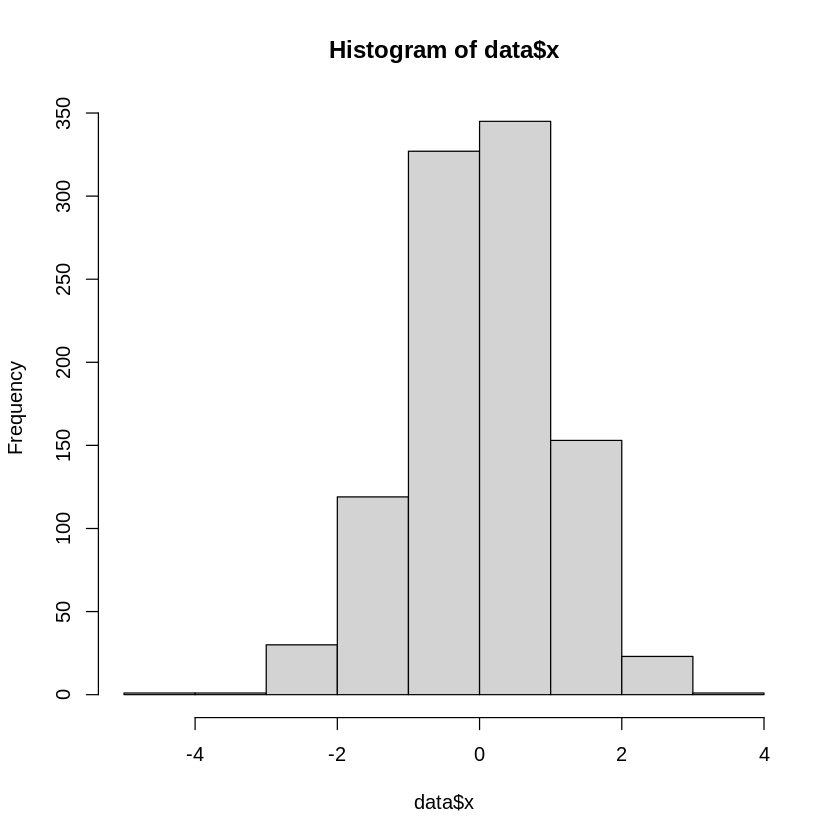

In [6]:
hist(data$x, breaks = 10)

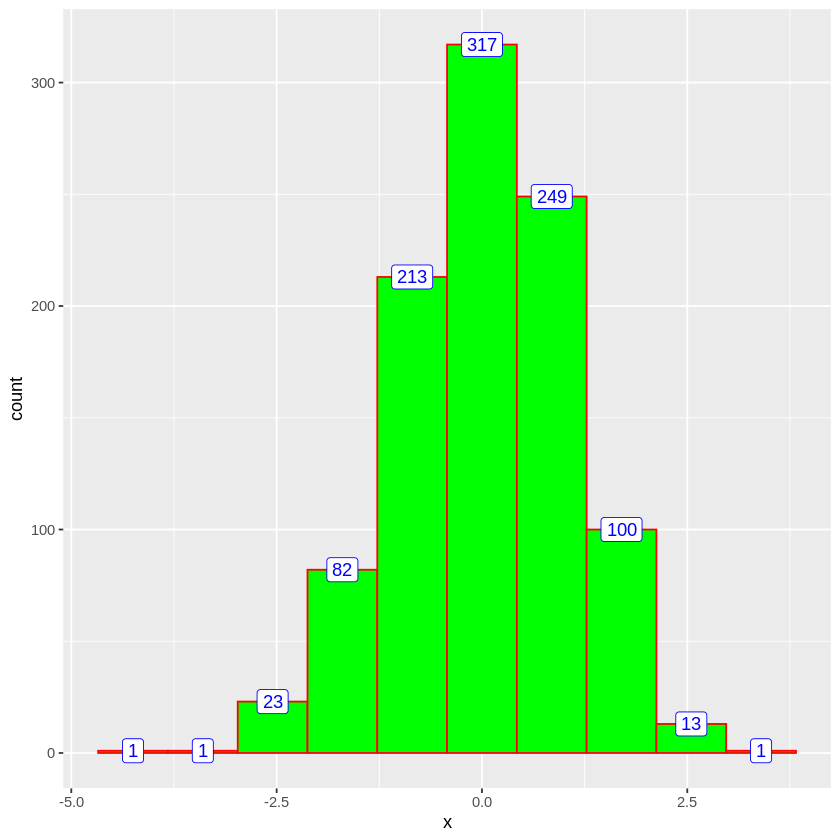

In [13]:
data %>%
  ggplot() + # mapeamos la data
  aes(x = x) +# indicamos las variables a graficar
  geom_histogram(
    bins = 10,
    fill = "green",
    col = "red"
  ) +
  stat_bin(# definimos bines para superponer etiquetas
    bins = 10,
    geom = "label",
    col = "blue",
    mapping = aes(label = after_stat(count))
  )



2.- Misma Visualización pero con histograma de frecuencias relativas.

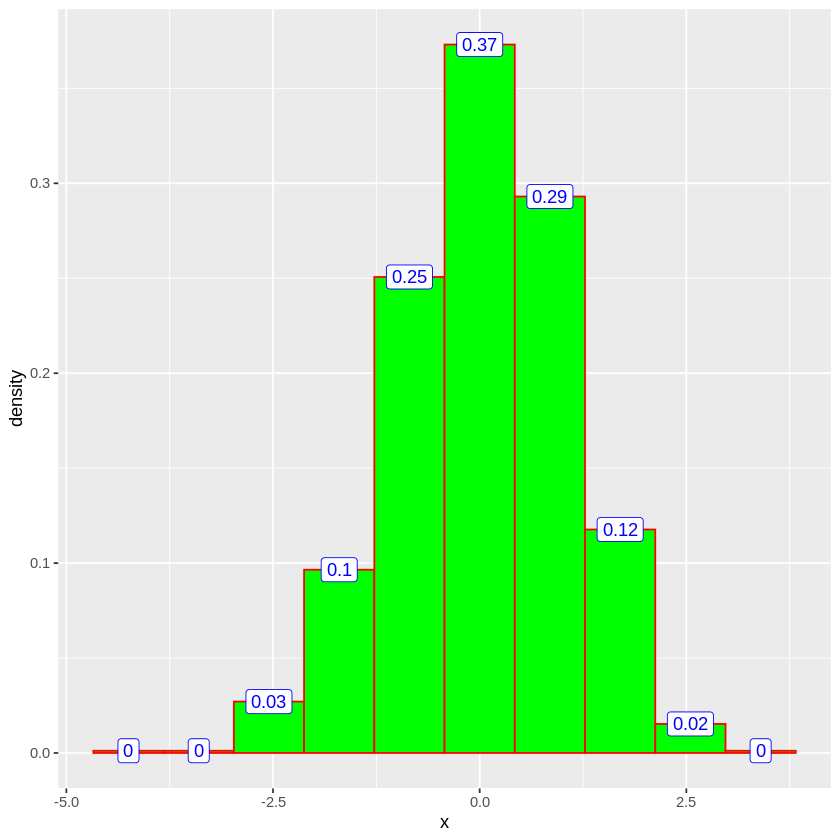

In [18]:
# Adicionalmente, si se quiere mostrar el histograma de frecuencia --------
#  es lo mismo pero se añade y = ..density.. en el maepo estético del histograma
data %>%
  ggplot() + # mapeamos la data
  aes(x = x, y = after_stat(density)) +# indicamos las variables a graficar
  geom_histogram(
    bins = 10,
    fill = "green",
    col = "red"
  ) +
  stat_bin(# definimos bines para superponer etiquetas
    bins = 10,
    geom = "label",
    col = "blue",
    mapping = aes(label = round(after_stat(density),2) )
  )



In [17]:
round(3.123456, 3)

[1] 3.123

## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

En este ejemplo consideraremos la data de vuelos, para o cual buscaremos visualizar la serie que contiene el total de vuelos por cada día.
Adicionalmente modificaremos la orientación de las etiquetas del eje X mediante la función `theme()`.

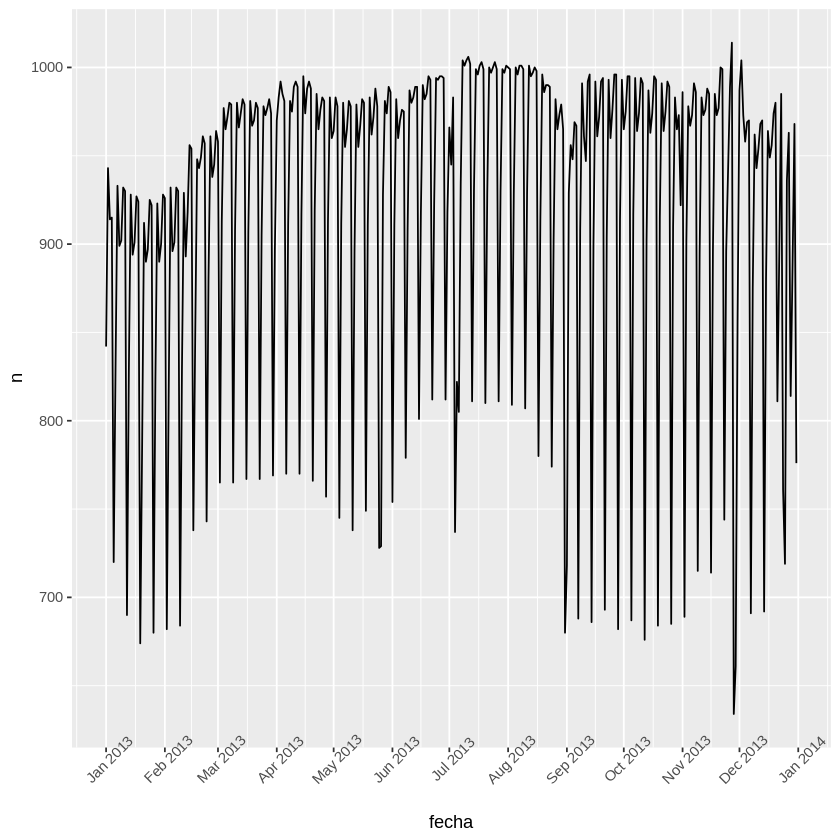

In [29]:
# Generamos la cantidad de vuelos por día
# A modo de ejemplo podemos visulizar el total de vuelos por día .
# La función element_text() permite modificar orientación, y ajste vertical y hoizontal

flights %>%
  mutate(fecha = as.Date(substr(time_hour,1,10) )) %>%
  count(fecha) %>% #generamos el gráfico
  ggplot() +
  aes(x = fecha, y = n) +
  geom_line() +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y") +
  theme(
    axis.text.x = element_text(angle = 45)
  )


In [ ]:

# Orientación etiquetas ejes ----------------------------------------------
data(flights)


## `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

1.- Construir un gráfico de barras con el total de vuelos por cada carrier.

1.5.- Construir un gráfico de barras con el total de vuelos por cada carrie, pero apuntando a un df con los conteos ya calulados.




In [ ]:
data(flights)

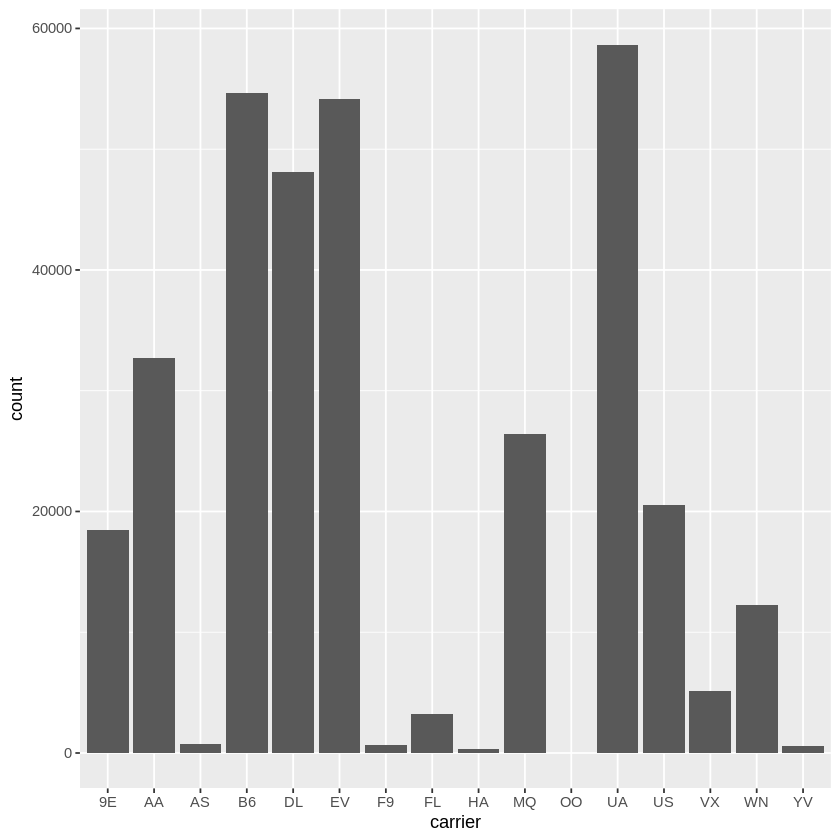

In [31]:
# Vuelos por carrier
flights %>%
  ggplot() +
  aes(x = carrier) +
  geom_bar() # R automáticamente generó el conteo de casos

In [32]:
vuelos_carrier <-
  flights %>%
  count(carrier)

In [33]:
head(vuelos_carrier)

carrier,n
<chr>,<int>
9E,18460
AA,32729
AS,714
B6,54635
DL,48110
EV,54173


In [38]:
library(scales)

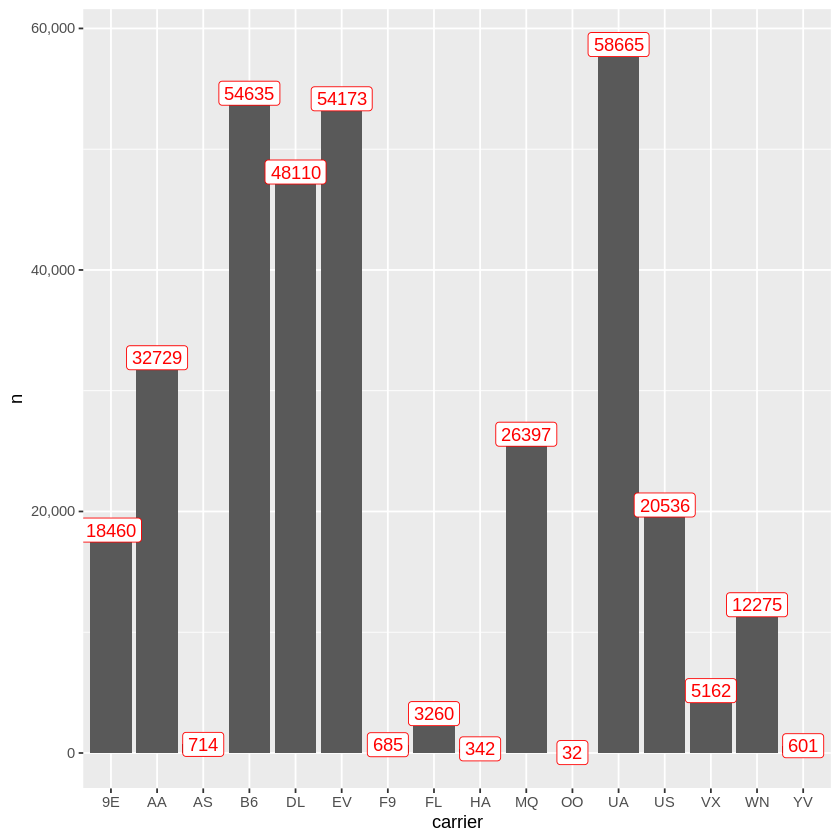

In [41]:
vuelos_carrier %>%
  ggplot() +
  aes(x = carrier, y = n) +
  geom_bar(stat = "identity") +
  geom_label(aes(label = n), color = "red") +
  scale_y_continuous(labels = scales::label_comma())